In [1]:
import pandas as pd


# Data

## Cleaning

To reduce dimensionality, since we don't have that much data, we simplify recipes by generalizing a few ingredients.  'Bread' summarizes all pitas, baguettes, hoagies, focaccias, etc.  All berries are called 'berry', and all nuts 'nut'.  So far I have not simplified the fish.  And plurals are replaced by the singular.

In [48]:
replace_words = {
    'bananas':'banana',
    'rigatoni':'pasta',
    'artichokes':'artichoke',
    'pears':'pear',
    'almonds':'almond',
    'cloves':'clove',
    'lettuces':'lettuce',
    'ramps':'ramp',
    'peanuts':'nut',
    'peanut':'nut',
    'pistachios':'pistachio',
    'anchovies':'anchovy',
    'mulberries':'berry',
    'mulberry':'berry',
    'blueberries':'berry',
    'blueberry':'berry',
    'strawberries':'berry',
    'strawberry':'berry',
    'persimmons':'persimmon',
    'eggplants':'eggplant',
    'lentils':'lentil',
    'steaks':'steak',
    'limes':'lime',
    'tomatillos':'tomatillo',
    'beets':'beet',
    'prunes':'prune',
    'spaghetti':'pasta',
    'nuts':'nut',
    'nectarines':'nectarine',
    'figs':'fig',
    'lobsters':'lobster',
    'cucumbers':'cucumber',
    'currants':'currant',
    'plantains':'plantain',
    'walnuts':'nut',
    'mushrooms':'mushroom',
    'cranberries':'cranberry',
    'turnips':'turnip',
    'oats':'oat',
    'chickpease':'chickpea',
    'peppers':'pepper',
    'apples':'apple',
    'scallions':'scallion',
    'pickles':'pickle',
    'sardines':'sardine',
    'croutons':'crouton',
    'endives':'endive',
    'shallots':'shallot',
    'tendrils':'tendril',
    'lemons':'lemon',
    'sprouts':'sprout',
    'pepitas':'pepita',
    'chantarelles':'mushroom',
    'clams':'fish',
    'plums':'plum',
    'onions':'onion',
    'peppercorns':'peppercorn',
    'mangoes':'mango',
    'ghee':'butter',
    'gin':'alcohol',
    'tequila':'alcohol',
    'wine':'alcohol',
    'capers':'caper',
    'grapes':'grape',
    'pomegranates':'pomegranate',
    'vodka':'alcohol',
    'cognac':'alcohol',
    'penne':'pasta',
    'clementine':'orange',
    'dates':'date',
    'tortillas':'tortilla',
    'leeks':'leek',
    'potatoes':'potato',
    'chips':'chip',
    'mangos':'mango',
    'cynar':'alcohol',
    'hazelnuts':'nut',
    'togarashi':'chile',
    'chickpeas':'chickpea',
    'lillet':'alcohol',
    'berries':'berry',
    'blackberries':'berry',
    'blackberry':'berry',
    'fregola':'pasta',
    'mussels':'fish',
    'oranges':'orange',
    'lychees':'lychee',
    'wakame':'seaweed',
    'peaches':'peach',
    'chickens':'chicken',
    'chives':'chive',
    'peas':'pea',
    'aperol':'alcohol',
    'beans':'bean',
    'noodles':'pasta',
    'breadcrumbs':'breadcrumb',
    'SKP':None,
    'avocados':'avocado',
    'raspberries':'berry',
    'grits':'grit',
    'aleppo':'chile',
    'chili':'chile',
    'sambal':'chile',
    'brandy':'alcohol',
    'carrots':'carrot',
    'eggs':'egg',
    'ribs':'rib',
    'apricots':'apricot',
    'chiles':'chile',
    'kombucha':'tea',
    'herbs':'herb',
    'rum':'alcohol',
    'sausages':'sausage',
    'olives':'olive',
    'jalapenos':'jalapeno',
    'marshmallows':'marshmallow',
    'parsnips':'parsnip',
    'tsukemono':'pickle',
    'cashews':'nut',
    'tomatoes':'tomato',
    'raisins':'raisin',
    'scallops':'fish',
    'kumquats':'kumquat',
    'crackers':'cracker',
    'chestnuts':'chestnut',
    'biscuits':'biscuit',
    'pecans':'nut',
    'pecan':'nut',
    'cherries':'cherry',
    'powder':'baking_powder',
    'soda':'baking_soda',
    'hot':'hot_sauce',
    'radishes':'radish',
    'daikon':'radish',
    'grapefruits':'grapefruit',
    'soppressata':'salami',
    '[1;5Boysters':'oyster',
    '5Boysters':'oyster',
    'oysters':'oyster',
    'cod':'fish',
    'halibut':'fish',
    'scallop':'fish',
    'clam':'fish',
    'salmon':'fish',
    'bass':'fish',
    'snapper':'fish',
    'mussel':'fish',
    'char':'fish',
    'swordfish':'fish',
    'mackerel':'fish',
    'yellowtail':'fish',
    'fluke':'fish',
    'cavatappi':'pasta',
    'nori':'seaweed',
    'acai':'berry',
    'riesling':'alcohol',
    'matcha':'tea',
    'orzo':'pasta',
    'ras-el-hanout':'masala',
    'cashew':'nut',
    'bonito':'fish',
    'campari':'alcohol',
    'kombu':'seaweed',
    'mirin':'alcohol',
    'trout':'fish',
    'kerupuk':'cracker',
    'vermouth':'alcohol',
    'baharat':'masala',
    'bourbon':'alcohol',
    'sherry':'alcohol',
    'tobiko':'fish',
    'cava':'alcohol',
    'mortadella':'salami',
    'lager':'alcohol',
    'beer':'alcohol',
    'mezcal':'alcohol',
    'sake':'alcohol',
    'dashi':'stock',
    'galangal':'ginger',
    'gorgonzola':'cheese',
    
}


# non ingredient words that sneaked through
skip_words = ['SKP', 
              'laksa', 
              '', 
              'tapenade', 
              'tandoori', 
              'pomodoro', 
              'gribiche',
              'toum',
              'raita',
              'nasi', 
              'chermoula,',
              'khao',
              '[1'
             ] 

The next cell creates a new csv, replacing all words according to the above dictionary, and removing duplicates.

In [49]:
with open('recipe_data.csv', 'r') as f:
    old_data = f.readlines()

new_data = open('new_recipe_data.csv', 'w')
all_ingredients = set()

for line in old_data:
    words = [w.strip() for w in line.split(',')]
    new_data.write('{},'.format(words[0]))
    
    ing_set = set()
    for word in words[1:]:
        if word in skip_words: continue
        if word in replace_words:
            ing_set.add(replace_words[word])
            all_ingredients.add(replace_words[word])
        else:
            all_ingredients.add(word)
            ing_set.add(word)
        
    for ing in ing_set:
        new_data.write('{},'.format(ing))
    new_data.write('\n')

new_data.close()

Now all we need to do is go through one more time, and create one-hot version.  First we save all_ingredients to a file so it will remain consistent.

In [50]:
all_ingredients = list(all_ingredients)

In [51]:
len(all_ingredients)

332

In [52]:
with open('new_ingredients.txt', 'w') as f:
    for ing in all_ingredients: f.write('{}\n'.format(ing))

Finally, we create a final csv with one-hot versions of the ingredients.
This uses new_ingredients from the file as the value headers, for consistency.

In [82]:
with open('new_ingredients.txt', 'r') as f:
    all_ingredients = [w.strip() for w in f.readlines()]

with open('new_recipe_data.csv', 'r') as f:
    data = f.readlines()
    
    
one_hots = open('one_hot_data.csv', 'w')

# Write a header
one_hots.write("Recipe_name,Rating")
for i in all_ingredients: one_hots.write(',{}'.format(i))
one_hots.write('\n')
    
for line in data:
    words = [w.strip() for w in line.split(',')]
    one_hots.write('{},'.format(words[0]))  # Leave a hole for ratings, to be added later
    
    for value in all_ingredients:
        if value in words[1:]:
            one_hots.write(',1')
        else:
            one_hots.write(',0')
            
    one_hots.write('\n')
    
    
one_hots.close()

In [83]:
df = pd.read_csv('one_hot_data.csv')

In [84]:
df.head()

,Recipe_name,Rating,chervil,romaine,cardamom,turnip,pear,ramp,spelt,cranberry,...,oil,coriander,scallion,cornmeal,marjoram,duck,cacao,palm,hummus,epazote
0,Stir-Fried Black Rice with Fried Egg and Roast...,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Citrus Shrimp Rice Bowls,NaN,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,Rice Bowls with Flaky Cod,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Farmers Market Farro Bowls,NaN,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,Vegetarian Taco Bowls,NaN,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


50 ingredients show up in less than a tenth of a percent of recipes.

I think it's safe to delete these ingredients all together.

In [85]:
sum(df.mean(0)<.001)


50

In [86]:
s = df.mean(0)<.001
# add value False for name column
s = pd.concat([pd.Series([False]), s] )
new_df = df[df.columns[~s]]

In [87]:
new_df.to_csv('one_hot_data.csv', index=False) # Save final version
new_df.shape

I've got 2500 recipes with about 280 ingredients.  Not too bad.

Now I just need to rate the recipes I've tried.
Unfortunately this is a manual job that doesn't have anything to display in a notebook.

## Visualisation

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

First, for fun, let's plot the frequencies of the 30 most common ingredients.

Text(0, 0.5, 'Percent of recipes')

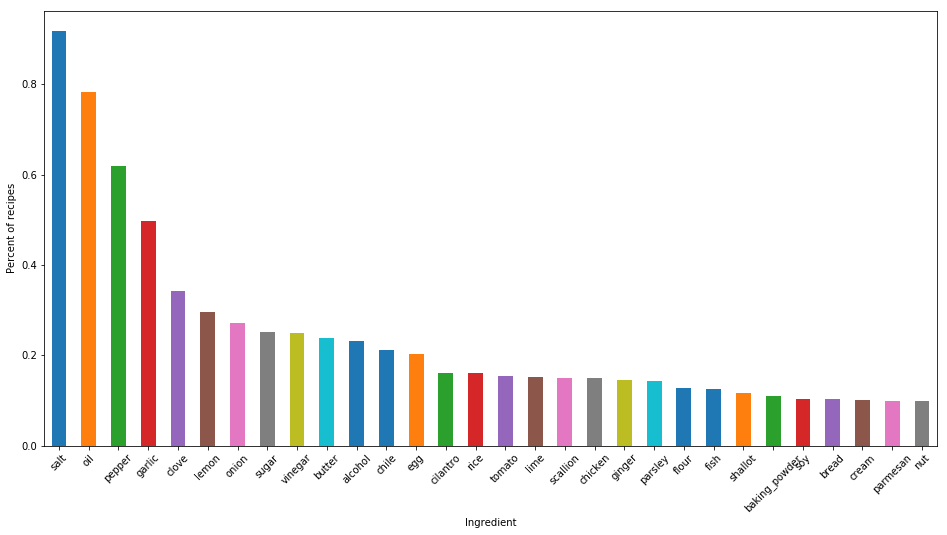

In [108]:
ax = data.mean(0).sort_values(ascending=False).iloc[:30].plot.bar(rot=45, figsize=(16,8))
ax.set_xlabel('Ingredient')
ax.set_ylabel('Percent of recipes')

Note that due to my janky web scraping, "pepper" includes all bell peppers, chili peppers, as well as black and white pepper.  This is, frankly, not the worst of the janks.

I was surprised that alcohol was in the top 30 (including, of course, all wines commonly used in cooking).

In [107]:
df.mean(0)['alcohol']

0.23178016726403824

Nearly a quarter of recipes have some form of alcohol in them!

We can get a picture of how these recipes are clustered in ingredient space using a high-dimensional data visualization tool like t-sne.  It's hard to come up with a good labeling scheme for all the recipes, but we can at least do some of them.

In the following code, I first color recipes with the word "salad" green, ones with the word "curry" red, and remaining ones with the ingredient "pasta" blue.  Of course, some dishes called salad may well have pasta in them.  We overlook this point for this basic visualization.

In [88]:
names = new_df['Recipe_name']
data = new_df.drop(columns=['Recipe_name', 'Rating'])
cols=[]
i=0

datas =[]

while i < len(names):
    n = names.iloc[i]
    d = data.iloc[i]
    if 'salad' in n.lower(): cols.append('green')
    elif 'curry' in n.lower(): cols.append('red')
    elif d['pasta']==1: cols.append('blue')
    
    else: 
        i += 1
        continue
    datas.append(d)
    i += 1
    


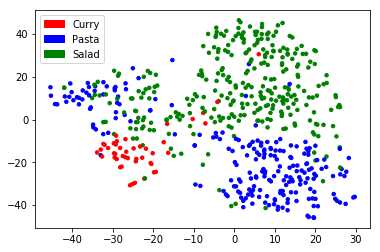

In [90]:
reduced_data = PCA(n_components=50).fit_transform(datas)
tsne = TSNE(n_components=2, perplexity=15).fit_transform(reduced_data)
plt.scatter(tsne[:,0], tsne[:,1], color=cols, s=12)

curry = mpatches.Patch(color='red', label='Curry')
pasta = mpatches.Patch(color='blue', label='Pasta')
salad = mpatches.Patch(color='green', label='Salad')


plt.legend(handles=[curry, pasta, salad])


We can see how dishes called curries tend to cluster, as well as those called salads.  Apparently recipes containing pasta (that aren't curries or salads) fall into at least two groups.  Perhaps soups vs non-soups?  It would be interesting to check but too much work for the moment.

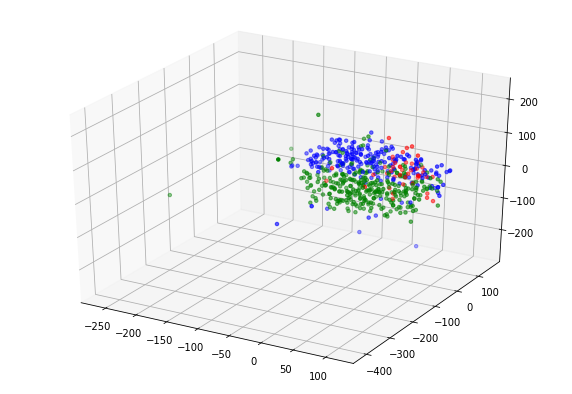

In [91]:
tsne = TSNE(n_components=3, perplexity=8).fit_transform(reduced_data)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(tsne[:,0], tsne[:,1], tsne[:,2], color=cols, s=12)
plt.show()